In [139]:
#Pike trying to create a graph of conflict related news reports on the current Armenia Azerbaijan war
#to highlight in increase in bellicose statements from the principle participant Azerbaijan
#I will attempt to graph news statements over time leading up to the current conflict
#Code adapted from http://linwoodc3.github.io/2017/10/15/Taking-the-Pulse-of-worldwide-news-Media-using-gdelt.html
#and https://nbviewer.jupyter.org/github/dmasad/GDELT_Intro/blob/master/Getting_Started_with_GDELT.ipynb
#https://stackoverflow.com/questions/28418988/hot-to-make-a-histogram-from-a-list-of-strings-in-python
#Brandon Mohr again helped out with this
import requests
import lxml.html as lh
import datetime as dt
from collections import defaultdict
import os.path #To help navigate the file directories
import urllib #To request from GDELT
import zipfile #TO unzip the files we downlaod
import glob #To go through multiple files in a directory
import operator 

import matplotlib.pyplot as plt
import pandas

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html') #Grab GDELT reference list which is by day
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href") #Returns all the possible CSV files of GDELT data as a references list

# separate out those links that begin with four digits 
'''
Will extract just the days resulting in list like: 
['20200617.export.CSV.zip',
 '20200616.export.CSV.zip',
 '20200615.export.CSV.zip',...]
 Until 2015
'''

file_list = [x for x in link_list if str.isdigit(x[0:4])]
file_list

['20201003.export.CSV.zip',
 '20201002.export.CSV.zip',
 '20201001.export.CSV.zip',
 '20200930.export.CSV.zip',
 '20200929.export.CSV.zip',
 '20200928.export.CSV.zip',
 '20200927.export.CSV.zip',
 '20200926.export.CSV.zip',
 '20200925.export.CSV.zip',
 '20200924.export.CSV.zip',
 '20200923.export.CSV.zip',
 '20200922.export.CSV.zip',
 '20200921.export.CSV.zip',
 '20200920.export.CSV.zip',
 '20200919.export.CSV.zip',
 '20200918.export.CSV.zip',
 '20200917.export.CSV.zip',
 '20200916.export.CSV.zip',
 '20200915.export.CSV.zip',
 '20200914.export.CSV.zip',
 '20200913.export.CSV.zip',
 '20200912.export.CSV.zip',
 '20200911.export.CSV.zip',
 '20200910.export.CSV.zip',
 '20200909.export.CSV.zip',
 '20200908.export.CSV.zip',
 '20200907.export.CSV.zip',
 '20200906.export.CSV.zip',
 '20200905.export.CSV.zip',
 '20200904.export.CSV.zip',
 '20200903.export.CSV.zip',
 '20200902.export.CSV.zip',
 '20200901.export.CSV.zip',
 '20200831.export.CSV.zip',
 '20200830.export.CSV.zip',
 '20200829.export.CS

In [140]:
#Counters to help assess how many files are coming and going out
infilecounter = 0
outfilecounter = 0

In [141]:
local_path = './results/' # Will save to empty results folder to help keep file clean
#Pike pulled the country codes and fought a tuple error
fips_country_code = 'AJ'



#Adjust list number to get days wanted 
for compressed_file in file_list[:10]:
    print(compressed_file,)
    
    # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
    while not os.path.isfile(local_path+compressed_file): 
        print('downloading,'),
        urllib.request.urlretrieve(url=gdelt_base_url+compressed_file, 
                           filename=local_path+compressed_file)
        
    # extract the contents of the compressed file to a temporary directory    
    print('extracting,'),
    z = zipfile.ZipFile(file=local_path+compressed_file, mode='r')    
    z.extractall(path=local_path+'tmp/')
    
    # parse each of the csv files in the working directory, 
    print('parsing,'),
    for infile_name in glob.glob(local_path+'tmp/*'):
        outfile_name = local_path+fips_country_code+'%04i.tsv'%outfilecounter
        
        # open the infile and outfile
        with open(infile_name, mode='r', encoding="ISO-8859-1") as infile, open(outfile_name, mode='w') as outfile:
            for line in infile:
                # extract lines with our interest country code
                if fips_country_code in operator.itemgetter(51, 37, 44)(line.split('\t')):    
                    outfile.write(line)
            outfilecounter +=1
            
        # delete the temporary file
        os.remove(infile_name)
    infilecounter +=1
    print('done', infilecounter)

20201003.export.CSV.zip
extracting,
parsing,
done 1
20201002.export.CSV.zip
extracting,
parsing,
done 2
20201001.export.CSV.zip
extracting,
parsing,
done 3
20200930.export.CSV.zip
extracting,
parsing,
done 4
20200929.export.CSV.zip
extracting,
parsing,
done 5
20200928.export.CSV.zip
extracting,
parsing,
done 6
20200927.export.CSV.zip
extracting,
parsing,
done 7
20200926.export.CSV.zip
extracting,
parsing,
done 8
20200925.export.CSV.zip
extracting,
parsing,
done 9
20200924.export.CSV.zip
extracting,
parsing,
done 10


In [142]:
import pandas as pd

# Get the GDELT field names from a helper file
colnames = pd.read_csv('CSV.header.fieldids.csv')['Field Name']


# Build DataFrames from each of the intermediary files
files = glob.glob(local_path+fips_country_code+'*')
DFlist = []
for active_file in files:
    print(active_file)
    DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
                              names=colnames, index_col=['GLOBALEVENTID'], encoding='iso-8859-1'))

# Merge the file-based dataframes and save a pickle
DF = pd.concat(DFlist)
DF.to_pickle(local_path+'backup'+fips_country_code+'.pickle')    
    
# once everything is safely stored away, remove the temporary files
for active_file in files:
    os.remove(active_file)

./results/AJ0000.tsv
./results/AJ0001.tsv
./results/AJ0002.tsv
./results/AJ0003.tsv
./results/AJ0004.tsv
./results/AJ0005.tsv
./results/AJ0006.tsv
./results/AJ0007.tsv
./results/AJ0008.tsv
./results/AJ0009.tsv


In [143]:
import pickle
#Pike changed the name from Niger_Data to Conflict_Data
Conflict_Data = pd.read_pickle(r"./results/backupAJ.pickle")

In [144]:
Conflict_Data.head()

,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
GLOBALEVENTID,,,,,,,,,,,,,,,,,,,,,
949990408,20201003,202010,2020,2020.7479,NaN,NaN,NaN,NaN,NaN,NaN,...,AM,4,"Zangilan, Z?ngilan, Azerbaijan",AJ,AJ69,39.0683,46.6951,-2709269,20201003,https://www.aa.com.tr/en/asia-pacific/armenia-...
949990844,20201003,202010,2020,2020.7479,ARM,ARMENIAN,ARM,NaN,NaN,NaN,...,NaN,4,"Zangilan, Z?ngilan, Azerbaijan",AJ,AJ69,39.0683,46.6951,-2709269,20201003,https://www.aa.com.tr/en/asia-pacific/armenia-...
949990852,20201003,202010,2020,2020.7479,ARM,ARMENIA,ARM,NaN,NaN,NaN,...,-2705195,4,"Baku, Baki*, Azerbaijan",AJ,AJ09,40.3953,49.8822,-2705195,20201003,https://www.rrstar.com/ZZ/news/20201002/armeni...
949990853,20201003,202010,2020,2020.7479,ARM,ARMENIA,ARM,NaN,NaN,NaN,...,-2705195,4,"Baku, Baki*, Azerbaijan",AJ,AJ09,40.3953,49.8822,-2705195,20201003,https://www.rrstar.com/ZZ/news/20201002/armeni...
949990854,20201003,202010,2020,2020.7479,ARM,ARMENIA,ARM,NaN,NaN,NaN,...,-2705195,4,"Konya, Konya, Turkey",TU,TU71,37.8714,32.4846,-761917,20201003,https://www.rrstar.com/ZZ/news/20201002/armeni...


In [145]:
def ref_dict(df):
    cols = list(df)
    ref_dict = {}
    for row in df.iterrows(): 
        ref_dict[row[1][cols[0]]] = row[1][cols[1]]
    
    return ref_dict

In [151]:
Conflict_Data_Month = []
for x in Conflict_Data.SQLDATE:
    Conflict_Data_Month.append(int(x))
    
Conflict_Data_Month.sort()



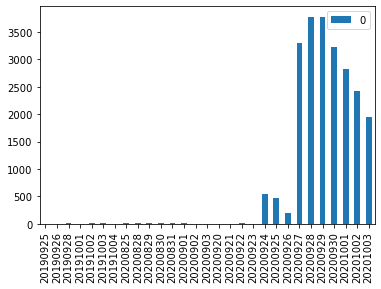

In [152]:
import pandas as pd
from collections import Counter
Date_Count = Counter(Conflict_Data_Month)
xf = pd.DataFrame.from_dict(Date_Count, orient='index')
xf.plot(kind='bar')

In [ ]:
#Pike we couldn't figure out where those 2019 dates came from but it accomplishes what I was trying to do